# Статистическая выкладка по симуляции

В этом ноутбуке собраны графики, отображающие совокупные результаты, полученные в результате большого количества генераций матчей, аналогичных тем, что были продемонстрированы в приложении. 

Основоное предназначение этой части работы - показать, что алгоритм, лежащий в основе приложения, является "честным", то есть на практике с равной частотой генерирует гипотетически равновероятные исходы и не отдает предпочтения ни одному из "игроков".

Демонстрируемая здесь информация интересна и сама по себе, поскольку теоретически соответствует реальному положению дел, при условии соответствия правил и *принятых условностей*. 

## Генерируем выборку:

In [59]:
from доминошки import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import random as rand

In [2]:
def fill_the_table(matches):
    
    df = pd.DataFrame({
        'match' : [],
        'player' : [],
        'score' : [],
        'wins_num' : [],
        'first_turns_num' : [],
        'games_in_match' : [],
        'fishes_in_match' : [],
        'is_a_goat' : [],
        })
    
    l = 0
    for i in range(matches):
        score_count,game_count,fish_count,goats = simulate_match(4,101)  
        for p,t in score_count.items():
            box = []
            box.append(i+1)
            box.append(p)
            for k,r in t.items():
                box.append(r)
            box.append(game_count)
            box.append(fish_count)
            box.append(p in goats)
            df.loc[l,:] = box
            l += 1
            
    return df

In [3]:
df = fill_the_table(10000)
df.head()

,match,player,score,wins_num,first_turns_num,games_in_match,fishes_in_match,is_a_goat
0,1.0,1.0,96.0,2.0,4.0,12.0,1.0,0.0
1,1.0,2.0,69.0,4.0,2.0,12.0,1.0,0.0
2,1.0,3.0,117.0,0.0,1.0,12.0,1.0,1.0
3,1.0,4.0,65.0,5.0,5.0,12.0,1.0,0.0
4,2.0,1.0,74.0,2.0,3.0,10.0,4.0,0.0


Выборка для эксперимента составила 10.000  матчей до 101 очка. Данные собирались для каждого отдельного игрока и включали набранное количество очков, количество побед в играх за матч, количество прав первого хода, статус (проиграл или нет), а также общее число игр и ничейных исходов.

## Результаты:

In [4]:
df_overall = df[df['player']==1]

In [5]:
def show_distribution(data,x,color,xlabel,ylabel,title,bins,hue,palette,multiple="stack"):
    plt.figure(figsize=(9,6),dpi=100)
    sns.histplot(data=data,x=x,color=color,bins=bins,hue=hue,palette=palette,multiple=multiple)
    plt.xlabel(xlabel,fontsize=14)
    plt.ylabel(ylabel,fontsize=14)
    sns.despine()
    plt.show()

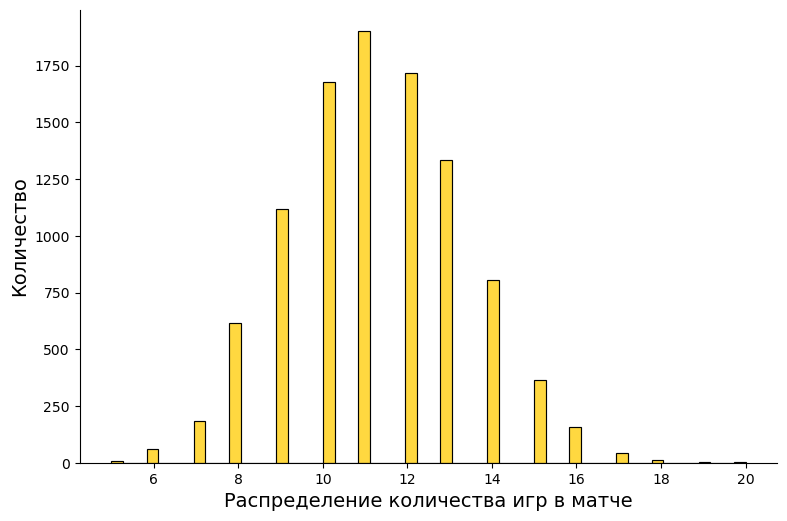

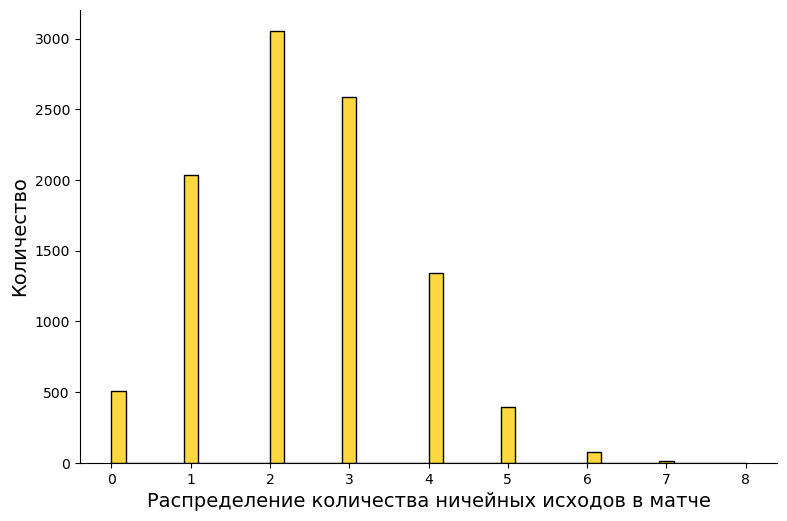

In [6]:
plt.style.use('fast')

show_distribution(data=df_overall,x='games_in_match',color='#ffcc00',
                  xlabel='Распределение количества игр в матче',ylabel='Количество',title=None,bins='auto',
                  hue=None,palette=None)

show_distribution(data=df_overall,x='fishes_in_match',color='#ffcc00',
                  xlabel='Распределение количества ничейных исходов в матче',ylabel='Количество',title=None,
                  bins='auto',hue=None,palette=None)

In [65]:
games_sample = rand.sample(list(df_overall['games_in_match']),500)
statistic, p = st.shapiro(games_sample)
if p > 0.05:
    print('Распределение числа игр - нормальное')
else:
    print('распределение числа игр - ненормальное')

        
fish_sample = rand.sample(list(df_overall['fishes_in_match']),500)
statistic, p = st.shapiro(fish_sample)
if p > 0.05:
    print('Распределение числа ничьих - нормальное')
else:
    print('распределение числа ничьих - ненормальное')

распределение числа игр - ненормальное
распределение числа ничьих - ненормальное


In [69]:
f"В среднем ничьих на матч: {df_overall.groupby('games_in_match').agg({'fishes_in_match':'mean'})['fishes_in_match'].mean()}"

'В среднем ничьих на матч: 2.0102640992751803'

Распределение количество игр в матчах получилось очень похожим на нормальное, хотя тест Шапиро-Уилка и опровергнул это предположение. В среднем, длина такого матча составила 11 игр. Далее, вероятность равномерно уменьшается в обе стороны. Очень небольшой процент матчей состоял из менее 7 игр или более 16. 

Распределение количества ничейных исходов (игр без победителя) вышло несколько скошенным вправо. В среднем, эта случайная величина составила 2 положительных исхода на матч. Чуть реже - 1, 3 или 4. Вероятность прочих исходов довольно мала. 

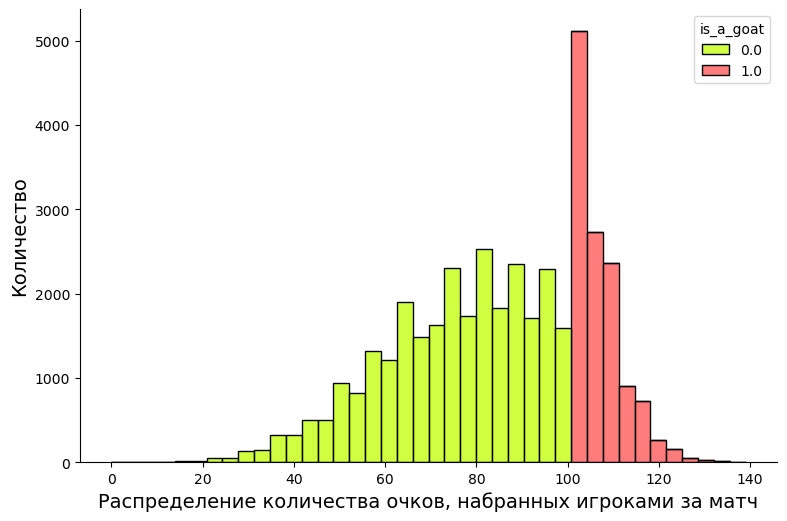

In [70]:
show_distribution(data=df,x='score',palette=['#bfff00','#ff5050'],
                  xlabel='Распределение количества очков, набранных игроками за матч',
                  ylabel='Количество',title=None,bins=40,hue='is_a_goat',color=None)

Распределение количества набранных за матч очков получилось достаточно логичным. И для проигравших, и для непроигравших этот показатель чаще всего находится в районе сотни. Это говорит о том, что зачастую игры оказываются достаточно близкими, и каждый из игроков в определенный момент оказывается в опасной близости к поражению. Разумеется, есть и исключения: некоторым игрокам удавалось заканчивать игры с невероятными 40 очками и меньше. Есть и противоположные примеры: игроки, проигравшие матч, набрав более 120 очков. 

In [73]:
print(f"Среднее количество очков у непроигравших: {df[df['is_a_goat']==0]['score'].mean()}")
print(f"Среднее количество очков у проигравших: {df[df['is_a_goat']==1]['score'].mean()}")

Среднее количество очков у непроигравших: 74.85336416853364
Среднее количество очков у проигравших: 106.9049975661204


В среднем, можно утверждать, что непроигравшие останавливаются где-то в районе 70-80 очков, а проигравшие набирают чуть больше 101.

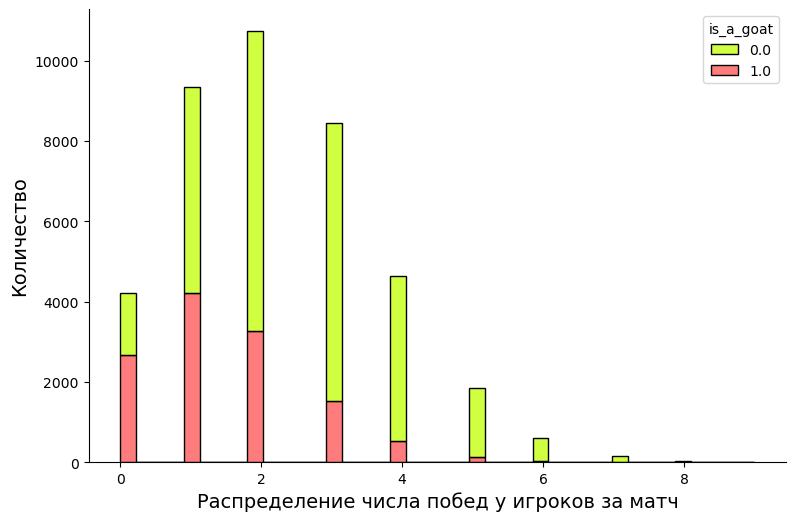

In [8]:
show_distribution(data=df,x='wins_num',palette=['#bfff00','#ff5050'],
                  xlabel='Распределение числа побед у игроков за матч',
                  ylabel='Количество',title=None,bins=40,hue='is_a_goat',color=None)

In [75]:
print(f"Среднее количество побед у непроигравших: {df[df['is_a_goat']==0]['wins_num'].mean()}")
print(f"Среднее количество побед у проигравших: {df[df['is_a_goat']==1]['wins_num'].mean()}")

Среднее количество побед у непроигравших: 2.552757100527571
Среднее количество побед у проигравших: 1.4711179620314783


Ситуация с победами тоже получиалсь интуйтивно понятной - проигравшие матч побеждают в среднем меньше, однако сказать, что они не побеждают совсем, нельзя. Разница здесь обычно составляет около 1 победы. При этом распределение числа побед и у тех, и у других одинаковое - со сдвигом вправо. Визуально это распределение очень похоже на распределение числа ничьих, полученное ранее. Это позволяет сделать вывод, что вероятность исхода без победителя примерно такая же, как у победы любого из игроков.

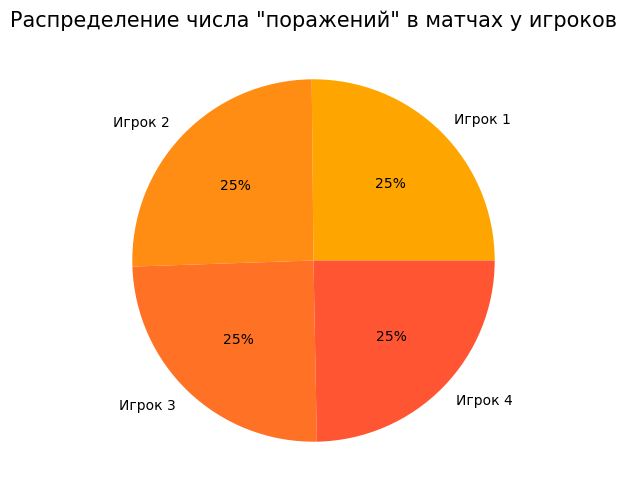

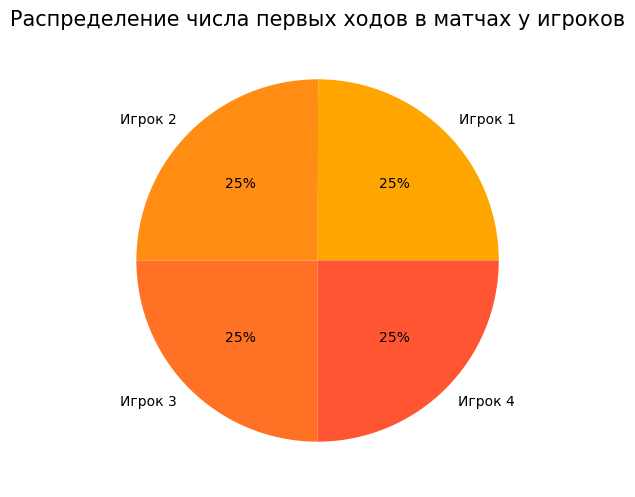

In [9]:
goats = df.groupby('player',as_index=False).agg({'is_a_goat':'sum'})
goats['player'] = ['Игрок 1','Игрок 2','Игрок 3','Игрок 4']

df['part_of_rolls'] = df['first_turns_num'] / df['games_in_match']
starts = df.groupby('player').agg({'part_of_rolls':'mean'})
starts['player'] = ['Игрок 1','Игрок 2','Игрок 3','Игрок 4']
    
plt.figure(figsize=(6,6),dpi=100)
plt.pie(data=goats,x='is_a_goat',labels='player',
       colors=['#ffa500','#ff8c13','#ff7124','#ff5533'],autopct='%.0f%%')
plt.title('Распределение числа "поражений" в матчах у игроков',fontsize=15)
plt.show()

plt.figure(figsize=(6,6),dpi=100)
plt.pie(data=starts,x='part_of_rolls',labels='player',
       colors=['#ffa500','#ff8c13','#ff7124','#ff5533'],autopct='%.0f%%')
plt.title('Распределение числа первых ходов в матчах у игроков',fontsize=15)
plt.show()

Наконец распределение случайных величин "право первого хода" и "поражение в матче" по игрокам оказалось близким к идеальному. Это можно считать главным подверждением "честности" и рандомности приложения.